# Problem Statement


This database contains 14 attributes related to heart disease. Our aim is to do Exploratory Data Analysis (EDA) and try to get initial insights of the dataset. This is a very crucial step before developing any sort of models to automate the task. EDA can help defining the significant features for solving problem statement. It can also help in suggesting business KPIs (Key Performance Indicators) depending upon the business problem.


### Methodology

EDA is divided into multiple stpes as mentioned below,
1. Data Cleaning and understanding: This step includes cleaning the existing data just after loading it into python environmnet. WE check the data for any missing values and treat them as per the requirements. We also need to look for constant value colulmns as that is not going to add any additional value to out analysis. Sometimes columns with very high proportion of any particular value also doesn't add any values. Hence, getting rid of them helps with further analysis. 

2. Data Preparation: This step is mainly usefull for feeding in the data into the model. But sometimes can be helpfull for doing EDA as well. E.g. making derived feature columns can help in Uni/bi-variate analysis.

3. Univariate Analysis: This step includes idetifying the relation between independent variable(s) Vs. dependent variable.

4. Bi-Variate Analysis: This step includes checking for the effect of 2 or more variables combined Vs. dependent variable.

5. Conclusion/Suggestions: This is the final step for EDA and includes drawing conclusions and suggesting action items in the problem.


### Importing Dependancies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [2]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


It can be observed that dataset is having 14 columns, which includes 1 target column.

1. age
2. sex: 1=male, 0=female
3. cp: chest pain type (4 values)
4. trestbps: resting blood pressure
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl
7. restecg: resting electrocardiographic results (values 0,1,2)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = Not available ,1 = fixed defect; 2 = normal; 3 = reversable defect
14. target: 1=yes, 0=no

In [3]:
# Data overview

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


It can be observed that,
- data is having no null values.  
- all the columns are of int64 type except one which is float64. However, we may need to change some of these columns to categorical.

## 1. Data Cleaning and understanding

In [4]:
# Dropping constant value columns (if any)

data = data.loc[:, (data != data.iloc[0]).any()] 
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We still have all 14 columns that means ther aren;t any constant value columns in dataset.

#### Checking for skewed data distribution in the dataseteach column

<AxesSubplot:xlabel='age', ylabel='Density'>

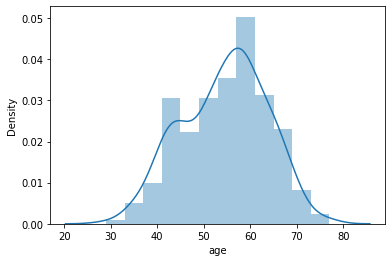

In [5]:
# age: Checking the distribution of age


sns.distplot(data.age)

In [6]:
# Gender

data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
# cp: Chest pain

data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

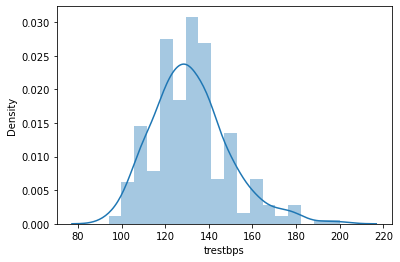

In [8]:
# trestbps: resting blood pressure: Checking the distribution

sns.distplot(data.trestbps)

<AxesSubplot:xlabel='chol', ylabel='Density'>

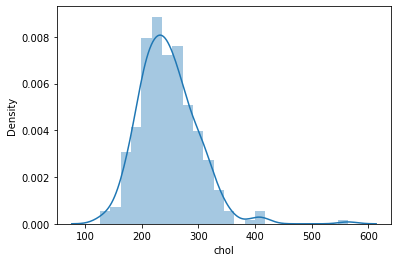

In [9]:
# chol: cholestrol: Checking the distribution

sns.distplot(data.chol)

In [10]:
# fbs: fasting blood sugar (1 if fasting blood sugar > 120 mg/dl or 0)

data.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [11]:
# restecg: resting electrocardiographic results (values 0,1,2)

data.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

It can be observed that frequency for category 2 is vary less. However we are not going to drop as there can be some usefull information present in those data entries.

<AxesSubplot:xlabel='thalach', ylabel='Density'>

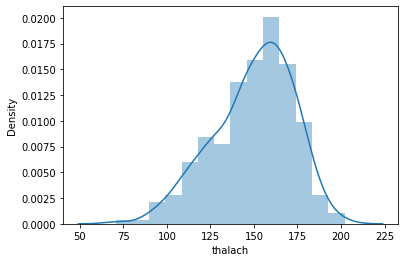

In [12]:
# thatach: maximum heart rate achieved
# Checking the distribution

sns.distplot(data.thalach)

In [13]:
# exang: exercise induced angina (1 = yes; 0 = no)

data.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

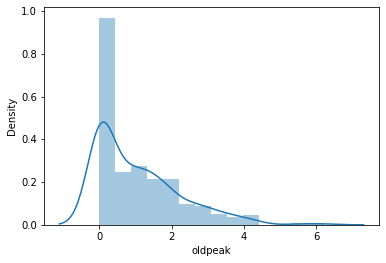

In [14]:
# oldpeak: oldpeak = ST depression induced by exercise relative to rest
# Checking the distribution


sns.distplot(data.oldpeak)

In [15]:
# slope: the slope of the peak exercise ST segment

data.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [16]:
# ca: number of major vessels (0-3) colored by flourosopy

data.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [17]:
# thal: 0 = Not available ,1 = fixed defect; 2 = normal; 3 = reversable defect

data.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [18]:
# target: 1=yes, 0=no

data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

## 2. Data preparation

#### Changing the datatype

- int64 to object: Caegorical column in int64 dtype need to be converted to object

In [19]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Mapping categorical columns to appropriate object values

data.sex = data.sex.map({0:'female', 1:'male'})
data.cp = data.cp.map({0:'cat_0', 1:'cat_1', 2:'cat_2', 3:'cat_3'})
data.fbs = data.fbs.map({0:'no', 1:'yes'})
data.restecg = data.restecg.map({0:'val_0', 1:'val_1', 2:'val_2'})
data.exang = data.exang.map({0:'no', 1:'yes'})
data.slope = data.slope.map({0:'up', 1:'flat', 2:'down'})
data.thal = data.thal.map({0:'Not_available', 1:'fixed_defect', 2:'normal', 3:'rev_defect'})
data.target = data.target.map({0:'no', 1:'yes'})

In [21]:
# updated data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


## 3. Univariate Analysis

#### 3.1 Age

<AxesSubplot:xlabel='age', ylabel='Count'>

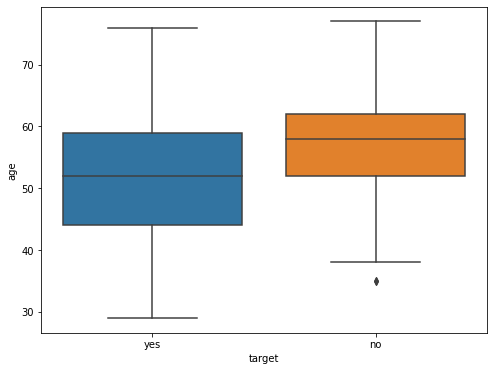

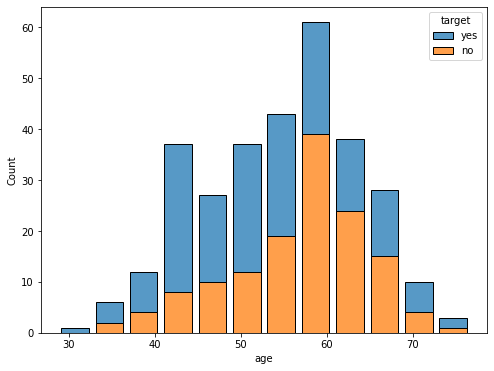

In [22]:
# age

plt.subplots(figsize = (8,6))
sns.boxplot(y = 'age',
             x = 'target',
             data = data)

plt.subplots(figsize = (8,6))
sns.histplot(x = 'age',
             hue = 'target',
             shrink=.8,
             multiple="stack",
             data = data)

It can be observed that,
1. heart disease in majorly found with people with median age of 50.
2. Some older people are observed not to have heart disease. The reason can be becasue we tend to detect underlying heart condition little earlier in life span. However, second figure is indicating that if elderly people having complaint regarding chest pain then chances of having heart disease is higher.

#### 3.2 Gender (sex)

<AxesSubplot:xlabel='sex', ylabel='count'>

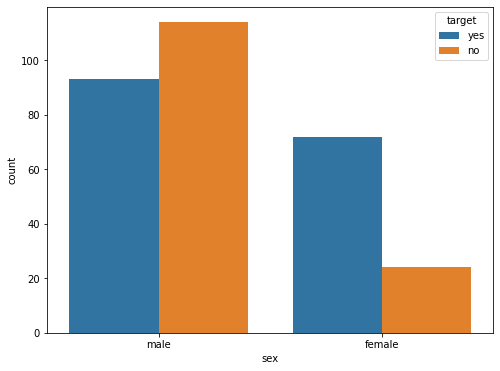

In [23]:
# sex: 1=male, 0=female

plt.subplots(figsize = (8,6))
sns.countplot(x = 'sex',
             hue = 'target',
             data = data)

As per the above figure, female are more prone to developing heart disease as compared to male. However, the dataset can be skewed and hence we can't draw this as a conclusion.

#### 3.3 Chest pain (cp)

<AxesSubplot:xlabel='cp', ylabel='count'>

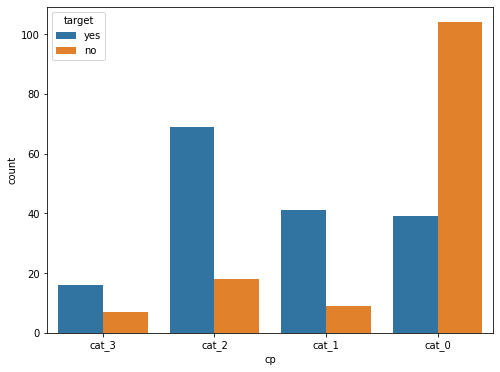

In [24]:
# cp: Chest pain type

plt.subplots(figsize = (8,6))
sns.countplot(x = 'cp',
             hue = 'target',
             data = data)

It can be obsrved that most of the heart disease patients are feeling category 1 and 2 kind of chest pain. Some patients are also feeling category 0.

#### 3.4 Resting blood pressure

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

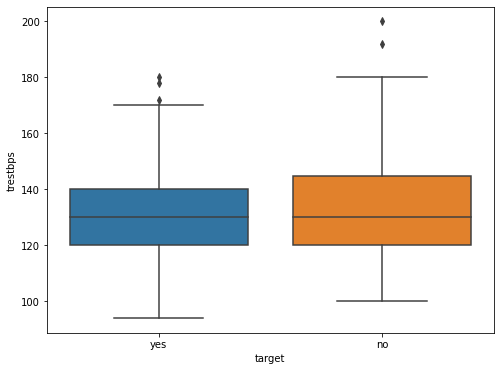

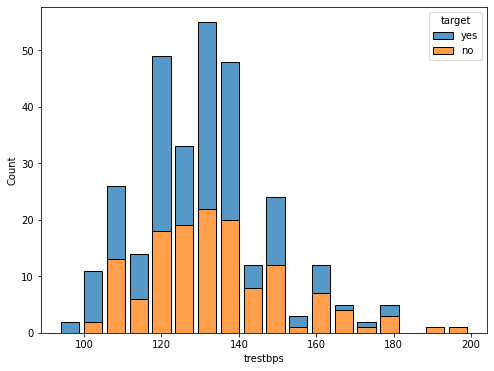

In [25]:
# trestbps: Resting blood pressure

plt.subplots(figsize = (8,6))
sns.boxplot(y = 'trestbps',
             x = 'target',
             data = data)

plt.subplots(figsize = (8,6))
sns.histplot(x = 'trestbps',
             hue = 'target',
             shrink=.8,
             multiple="stack",
             data = data)

From above plot it can be observed that,
1. Box plot is showing resting blood pressure in the same range and median values for both normal and patients.
2. However second plot indicates that some normal individuals have very high values of resting blood pressure. Hence, very high resting blood pressure is not an indicator of underlying heart disease.

#### 3.5 Cholestrol level

<AxesSubplot:xlabel='chol', ylabel='Count'>

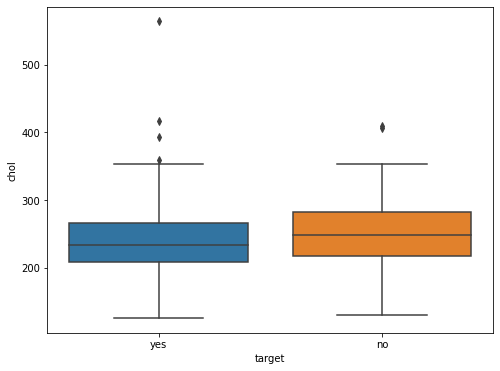

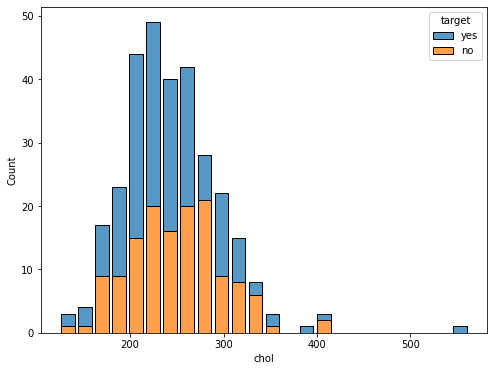

In [26]:
# Chol: Cholestrol level

plt.subplots(figsize = (8,6))
sns.boxplot(y = 'chol',
             x = 'target',
             data = data)

plt.subplots(figsize = (8,6))
sns.histplot(x = 'chol',
             hue = 'target',
             shrink=.8,
             multiple="stack",
             data = data)

Observations,
1. Cholestrol level is not indicating any differnece in the median value for people with heart disease and without.
2. People generally tend to have cholestrol level in the range of 200-300.

#### 3.6 Fasting blood sugar level

<AxesSubplot:xlabel='fbs', ylabel='count'>

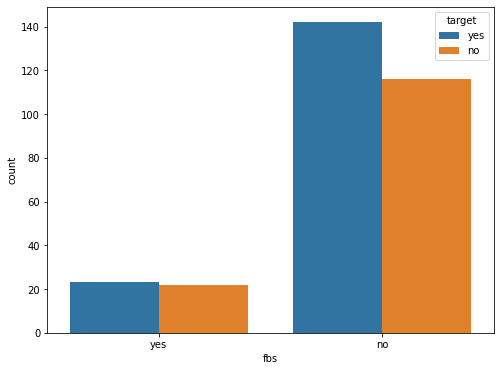

In [27]:
# fbs: fasting blood sugar > 120 mg/dl

plt.subplots(figsize = (8,6))
sns.countplot(x = 'fbs',
             hue = 'target',
             data = data)

It can be observed that,
- most of the people have fasting blood sugar <=120 mg/dl. 
- However if fasting blood sugar is higher that 120 mg/dl it is not indicative of having heart disease as both classes have almost equal proportion of people with/without heart disease.

#### 3.7 resting electrocardiographic resultsm

<AxesSubplot:xlabel='restecg', ylabel='count'>

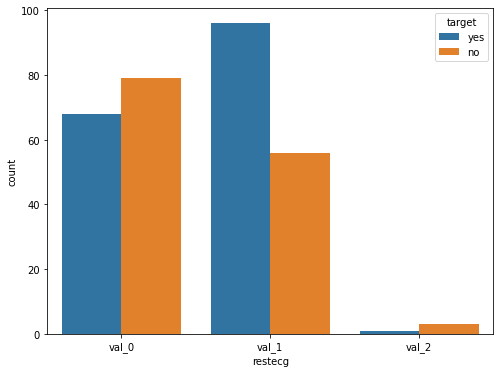

In [28]:
# restecg: resting electrocardiographic results (values 0,1,2)

plt.subplots(figsize = (8,6))
sns.countplot(x = 'restecg',
             hue = 'target',
             data = data)

It can be observed that,
- people with resting electrocardiographic results with value 1 tend to have heart disease as compared to othere categories. 
- restecg with values 2 rarely have heart disease.

#### 3.8 maximum heart rate achieved

<AxesSubplot:xlabel='thalach', ylabel='Count'>

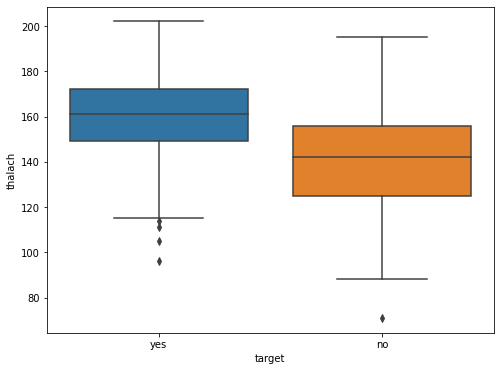

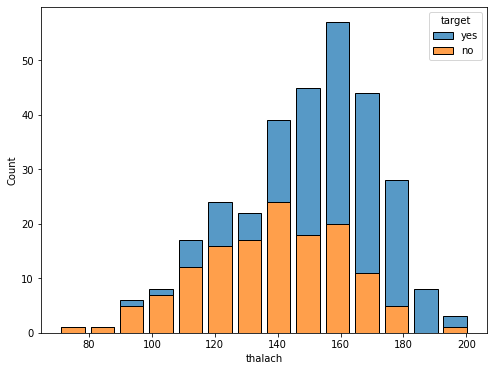

In [29]:
# thalach: maximum heart rate achieved

plt.subplots(figsize = (8,6))
sns.boxplot(y = 'thalach',
             x = 'target',
             data = data)

plt.subplots(figsize = (8,6))
sns.histplot(x = 'thalach',
             hue = 'target',
             shrink=.8,
             multiple="stack",
             data = data)

Observations,
1. Box plot gives clear indication of probable heart disease if person is having thatach value in the range of 160 or beyond. However 140 is the safe range.
2. Histogram shows that proportion of people with heart disease increases with thatach in the range of 160. It reduces and tend to get 0 near 80-100.

#### 3.9 exercise induced angina

<AxesSubplot:xlabel='exang', ylabel='count'>

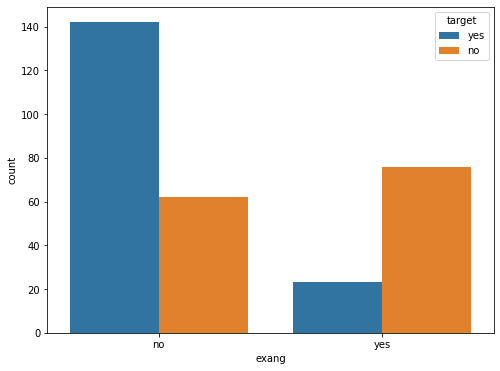

In [30]:
# exang: exercise induced angina (1 = yes; 0 = no)

plt.subplots(figsize = (8,6))
sns.countplot(x = 'exang',
             hue = 'target',
             data = data)

It can be observed that,
- Exercise induced angine if not found, then chances of underlying heart disease increases.

#### 3.10 ST depression induced by exercise relative to rest

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

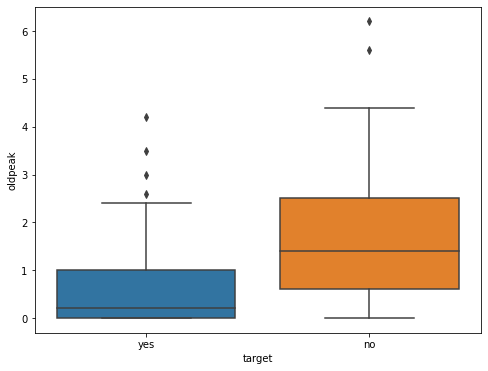

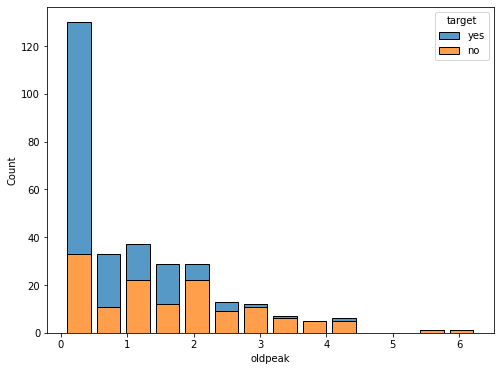

In [31]:
# oldpeak: oldpeak = ST depression induced by exercise relative to rest

plt.subplots(figsize = (8,6))
sns.boxplot(y = 'oldpeak',
             x = 'target',
             data = data)

plt.subplots(figsize = (8,6))
sns.histplot(x = 'oldpeak',
             hue = 'target',
             shrink=.8,
             multiple="stack",
             data = data)

Observations,
1. Boxplot indicates that poeple with heart disease tend to have ST depression induced by exercise relative to rest in the range near to 0. While without heart disease it is between 1 to 3.
2. Histomgram tell the similar story that is, proportion of people with to without heart disease increase if oldpeak value is near to 0.

#### 3.11 Slope of the peak exercise ST segment

<AxesSubplot:xlabel='slope', ylabel='count'>

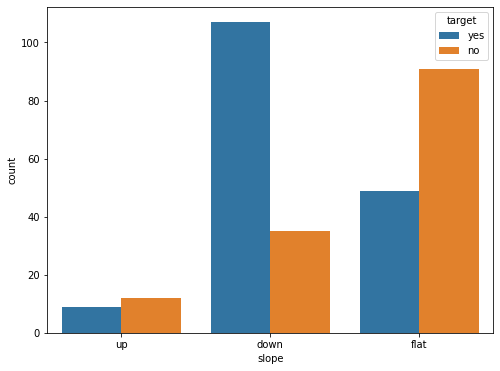

In [32]:
# slope: the slope of the peak exercise ST segment: Value 0: upsloping, Value 1: flat, Value 2: downsloping

plt.subplots(figsize = (8,6))
sns.countplot(x = 'slope',
             hue = 'target',
             data = data)

It can be observed that,
- Pople with ST segment downslopping tend to have underlying heart cndiotn as compared to flat/up-sloping.
- The chances of having heart disease reduces drastically of ST segment is up-sloping.

#### 3.12 Number of major vessels (0-3) colored by flourosopy

<AxesSubplot:xlabel='ca', ylabel='count'>

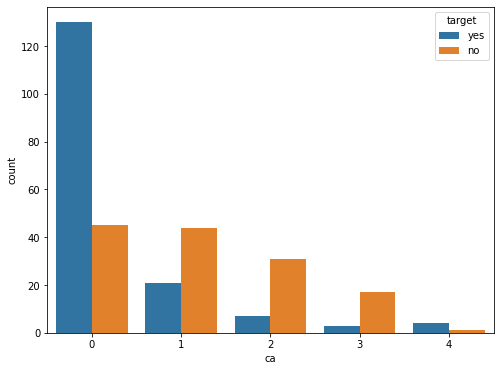

In [33]:
# ca: number of major vessels (0-3) colored by flourosopy

plt.subplots(figsize = (8,6))
sns.countplot(x = 'ca',
             hue = 'target',
             data = data)

Observation,
- Chances of having heart problem reduces with increase in the ca value.

#### 3.13 Thal

<AxesSubplot:xlabel='thal', ylabel='count'>

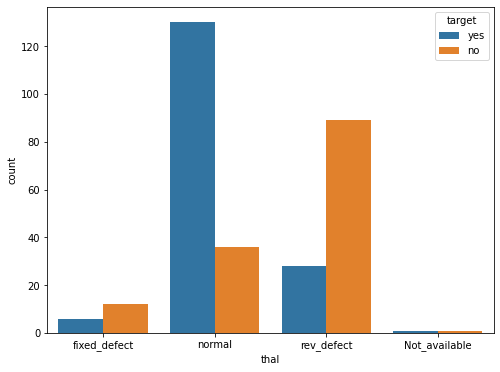

In [34]:
# thal: 0 = Not available ,1 = fixed defect; 2 = normal; 3 = reversable defect

plt.subplots(figsize = (8,6))
sns.countplot(x = 'thal',
             hue = 'target',
             data = data)

It can be observed that people with thal category 2 (normal) tend to have heart condiotn as compared to categories 1 (fixed defect) and 3 (reversible defect). 

## 4. Bi-variate Analysis

<AxesSubplot:xlabel='sex', ylabel='age'>

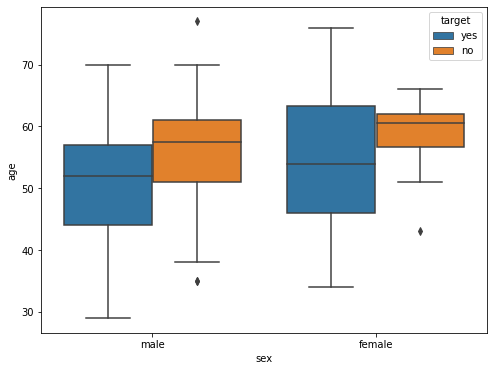

In [35]:
plt.subplots(figsize = (8,6))
sns.boxplot(x= 'sex', y= 'age', data= data, hue='target')

Observation,
- Female tend to get heart disease at little older age as compared to male.

<AxesSubplot:xlabel='cp', ylabel='trestbps'>

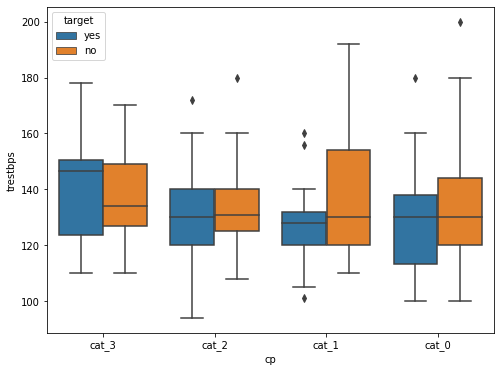

In [36]:
plt.subplots(figsize = (8,6))
sns.boxplot(x= 'cp', y= 'trestbps', data= data, hue='target')

Cat_3 kind of check pain in cobination of higher resting blood pressure increases the chances of having heart disease.

<AxesSubplot:xlabel='sex', ylabel='chol'>

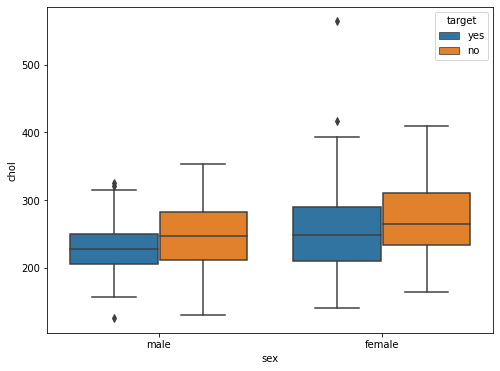

In [37]:
plt.subplots(figsize = (8,6))
sns.boxplot(x= 'sex', y= 'chol', data= data, hue='target')

Female in general tend to have higher cholestrol levels.

<AxesSubplot:xlabel='sex', ylabel='thalach'>

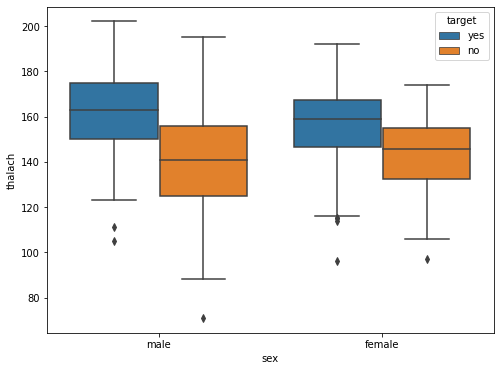

In [38]:
plt.subplots(figsize = (8,6))
sns.boxplot(x= 'sex', y= 'thalach', data= data, hue='target')

- There higher thalach value indicates possible heart disease. However, the median thalach value for male is little higher as compared to female.
- It is easy to conclude heart disease in male based on thalach value as comapred to female, because of wide difference in median thalach values between normal Vs patient.

<AxesSubplot:xlabel='exang', ylabel='thalach'>

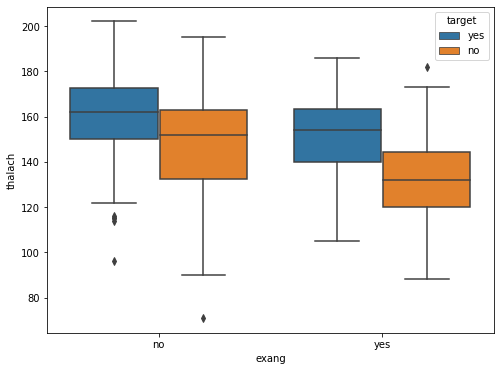

In [39]:
plt.subplots(figsize = (8,6))
sns.boxplot(x= 'exang', y= 'thalach', data= data, hue='target')

- Absence of exercise induced agina and higher thalach increases the chances of having heart disease.

## 5. Conclusion/Suggestions

Conclusion:
- The combination of thalach value >=160 and absence of exercice induced angina increases the chances of having heart disease.
- oldpeak (ST depression induced by exercise relative to rest) value near to 0 clearly indicates presence of heart disease
- Slope of the peak exercise ST segment downwards increases the chances of having heart disease.
- Category 3 chest pain in combination with higher resting blood pressure makes the case of having heart disease stronger.
- Female tend to get heart illness at the older age as comapred to male.


Suggestion:
- Above mentioned features can be stressed while diagnosing for heart related illness. 
- During model development and selection above features should be considered.

-----------------------------